In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
# Ajoutez le chemin du dossier parent à la variable d'environnement PYTHONPATH
parent_path = os.path.abspath("/Users/lucasinglese/Desktop/Challenge/6. CODES/FEATURES")
sys.path.append(parent_path)
from FeaturesLibrary import *
from Signals import *
from FeaturesImportance import *

# Data Import

In [54]:
# Import the data
eurusd = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_EURUSD.csv", parse_dates=True, index_col="time").iloc[0:5000,:]
gbpusd = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_GBPUSD.csv", parse_dates=True, index_col="time").iloc[0:5000,:]
usdcad = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_USDCAD.csv", parse_dates=True, index_col="time").iloc[0:5000,:]
usdjpy = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_USDJPY.csv", parse_dates=True, index_col="time").iloc[0:5000,:]
usdchf = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_USDCHF.csv", parse_dates=True, index_col="time").iloc[0:5000,:]

# Target Engineering

In [55]:
# Create the labels (that will allow us to find the interesting features that are related to them)
eurusd["time"] = eurusd.index
eurusd["time"] = eurusd["time"].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
eurusd = get_barrier(eurusd, tp=.0035, sl=-.0020, buy=True)

gbpusd["time"] = gbpusd.index
gbpusd["time"] = gbpusd["time"].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
gbpusd = get_barrier(gbpusd, tp=.0035, sl=-.0020, buy=True)

usdcad["time"] = usdcad.index
usdcad["time"] = usdcad["time"].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
usdcad = get_barrier(usdcad, tp=.0035, sl=-.0020, buy=True)

usdjpy["time"] = usdjpy.index
usdjpy["time"] = usdjpy["time"].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
usdjpy = get_barrier(usdjpy, tp=.0035, sl=-.0020, buy=True)

usdchf["time"] = usdchf.index
usdchf["time"] = usdchf["time"].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
usdchf = get_barrier(usdchf, tp=.0035, sl=-.0020, buy=True)

100%|█████████████████████████████████████| 5000/5000 [00:02<00:00, 2427.51it/s]


index 0 is out of bounds for axis 0 with size 0


100%|█████████████████████████████████████| 5000/5000 [00:01<00:00, 2610.45it/s]


index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


100%|█████████████████████████████████████| 5000/5000 [00:02<00:00, 2357.64it/s]


index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


100%|█████████████████████████████████████| 5000/5000 [00:01<00:00, 2517.03it/s]


index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


100%|█████████████████████████████████████| 5000/5000 [00:02<00:00, 2488.02it/s]

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


In [56]:
def dummy_labeling(df):
    df_copy = df.copy()
    
    df_copy["dummy"] = -1
    df_copy.loc[df_copy["labeling"]<0, "dummy"] = 0
    df_copy.loc[0<df_copy["labeling"], "dummy"] = 1
    
    df_copy = df_copy[df_copy["dummy"]!=-1]
    
    return df_copy

In [57]:
eurusd = dummy_labeling(eurusd)
gbpusd = dummy_labeling(gbpusd)
usdcad = dummy_labeling(usdcad)
usdjpy = dummy_labeling(usdjpy)
usdchf = dummy_labeling(usdchf)

In [58]:
for asset in [eurusd, gbpusd, usdjpy, usdcad, usdchf]:
    print(len(asset))

4972
4976
4966
4979
4968


In [59]:
eurusd

,open,high,low,close,tick_volume,low_time,high_time,time,labeling,dummy
time,,,,,,,,,,
2015-01-02 12:00:00,1.20467,1.20600,1.20347,1.20377,14827,2015-01-02 15:36:00,2015-01-02 12:48:00,2015-01-02 12:00:00,-7.6,0
2015-01-02 16:00:00,1.20377,1.20437,1.20069,1.20131,19160,2015-01-02 19:36:00,2015-01-02 16:00:00,2015-01-02 16:00:00,-3.6,0
2015-01-02 20:00:00,1.20133,1.20154,1.20011,1.20029,9335,2015-01-02 23:12:00,2015-01-02 20:00:00,2015-01-02 20:00:00,-52.8,0
2015-01-03 00:00:00,1.20030,1.20055,1.19997,1.20014,1351,2015-01-03 00:24:00,2015-01-03 00:00:00,2015-01-03 00:00:00,-48.8,0
2015-01-05 00:00:00,1.19454,1.19755,1.18642,1.19624,13941,2015-01-05 00:48:00,2015-01-05 03:36:00,2015-01-05 00:00:00,-0.8,0
...,...,...,...,...,...,...,...,...,...,...
2018-02-22 12:00:00,1.22839,1.23080,1.22691,1.22695,42210,2018-02-22 15:36:00,2018-02-22 15:12:00,2018-02-22 12:00:00,6.4,1
2018-02-22 16:00:00,1.22700,1.23522,1.22645,1.23254,60705,2018-02-22 16:00:00,2018-02-22 18:24:00,2018-02-22 16:00:00,2.4,1
2018-02-22 20:00:00,1.23254,1.23445,1.23194,1.23267,22463,2018-02-22 23:12:00,2018-02-22 20:24:00,2018-02-22 20:00:00,-11.6,0


# Features Engineering

In [60]:
def create_features(df):
    df = rolling_adf(df, "close", window_size=30)
    df = DC_market_regime(df, 0.015)
    df = spread(df)
    df = kama_market_regime(df, "close", 30, 100)
    df = gap_detection(df)
    df = displacement_detection(df)
    for i in [1,2,5,10,20,50]:
        df = auto_corr(df, "close", n=50, lag=i)
        df = log_transform(df, "close", i)
    df = derivatives(df,"close")
    df = candle_information(df)
    df = moving_yang_zhang_estimator(df, 100)
    df = moving_parkinson_estimator(df,20)
    
    return df

eurusd = create_features(eurusd.iloc[:-1,:])
gbpusd = create_features(gbpusd.iloc[:-1,:])
usdcad = create_features(usdcad.iloc[:-1,:])
usdjpy = create_features(usdjpy.iloc[:-1,:])
usdchf = create_features(usdchf.iloc[:-1,:])

# Train/Test

In [61]:
eurusd_train = eurusd.iloc[:3000,:]
eurusd_test = eurusd.iloc[3000:,:]

gbpusd_train = gbpusd.iloc[:3000,:]
gbpusd_test = gbpusd.iloc[3000:,:]

usdcad_train = usdcad.iloc[:3000,:]
usdcad_test = usdcad.iloc[3000:,:]

usdjpy_train = usdjpy.iloc[:3000,:]
usdjpy_test = usdjpy.iloc[3000:,:]

usdchf_train = usdchf.iloc[:3000,:]
usdchf_test = usdchf.iloc[3000:,:]

# Features - Target Building

In [62]:
list_X = ["velocity", "acceleration", "candle_way", "filling", "spread", "tick_volume",
          'ret_log_1', 'ret_log_2', 'ret_log_5', 'ret_log_10',
       'ret_log_20', 'ret_log_50', 'autocorr_1', 'autocorr_2', 'autocorr_5',
       'autocorr_20',"autocorr_10", "kama_diff",
          "amplitude","rolling_volatility_yang_zhang", "rolling_volatility_parkinson",
         "kama_trend", "rolling_adf_stat"]
col_y = "dummy"

# Correlation

In [63]:
# Make a copy of the dataframe and drop rows with NA values
correlations = []
assets = [eurusd_train, gbpusd_train, usdjpy_train, usdcad_train, usdchf_train]
for asset in assets:
    df_copy = asset[list_X + [col_y]].dropna()

    # Create feature matrix X and target vector y
    X = df_copy[list_X].iloc[:-1,:]
    y = df_copy[col_y].iloc[1:]

    dfc = pd.concat((X,y), axis=1)

    correlations.append(dfc.corr()[col_y])

In [64]:
correlation = pd.concat(correlations, axis=1)
correlation.columns = ["EURUSD", "GBPUSD", "USDJPY", "USDCAD", "USDCHF"]
correlation = correlation.transpose()
del correlation[col_y]
correlation = correlation.transpose()

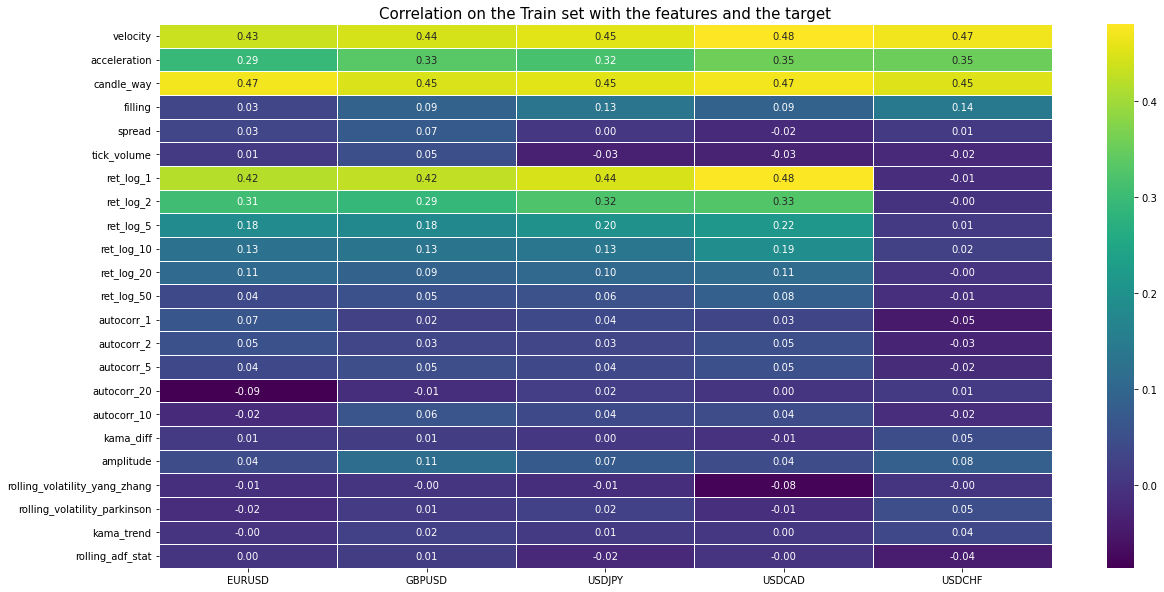

In [65]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)
plt.title("Correlation on the Train set with the features and the target", size=15)
plt.show()

In [66]:
list_X = ["velocity", "acceleration", "candle_way",
          'ret_log_1', 'ret_log_2', 'ret_log_5',
          "rolling_volatility_yang_zhang", "rolling_volatility_parkinson"]

# Features Importance

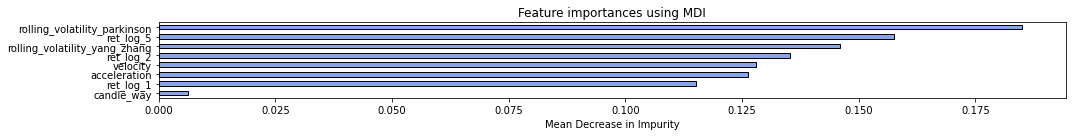

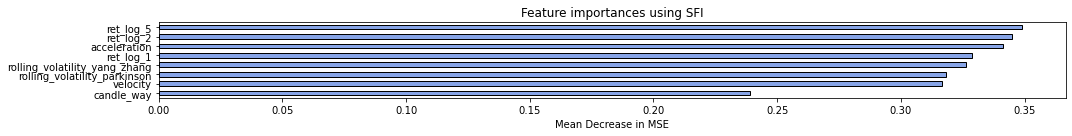

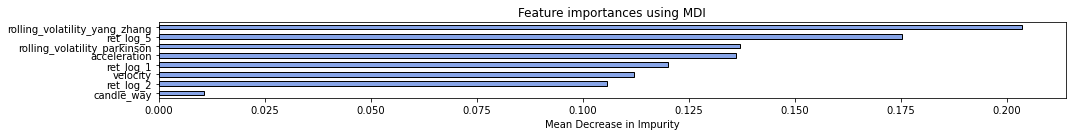

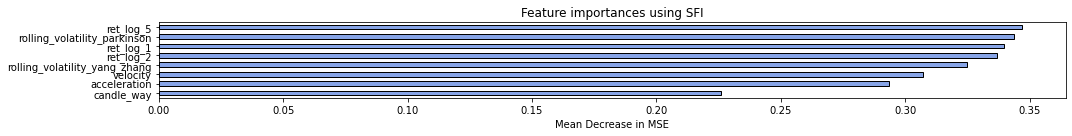

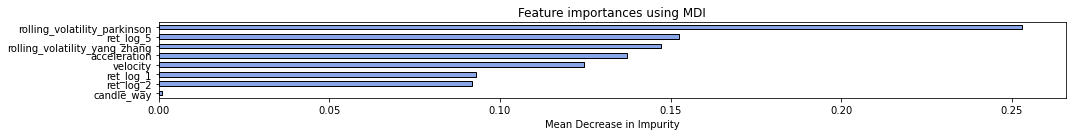

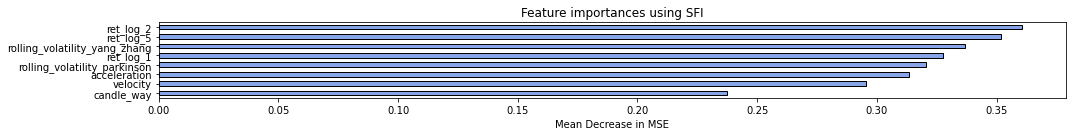

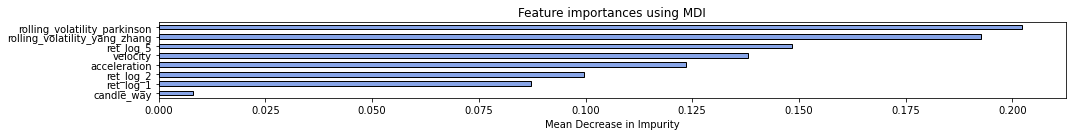

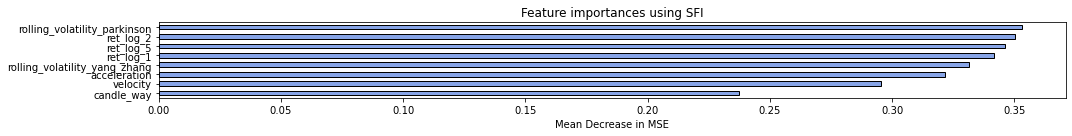

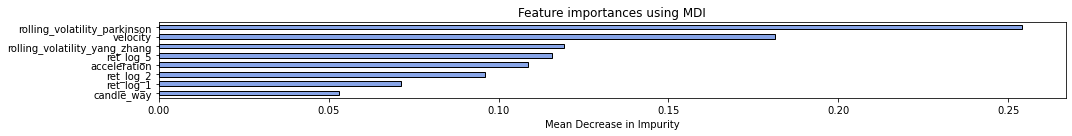

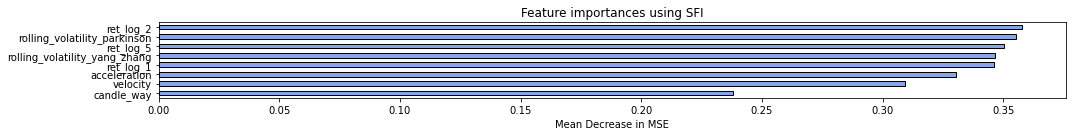

In [67]:
assets = [eurusd_train, gbpusd_train, usdjpy_train, usdcad_train, usdchf_train]
for asset in assets:
    feature_importance(asset, list_X, col_y, reg=False, mda=False)

# Model

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [79]:
df = pd.concat((eurusd_train, gbpusd_train, usdjpy_train), axis=0)
df[list_X].corr()

,velocity,acceleration,candle_way,ret_log_1,ret_log_2,ret_log_5,rolling_volatility_yang_zhang,rolling_volatility_parkinson
velocity,1.000000,0.711863,0.372593,0.031593,0.022002,0.013908,-0.002899,-0.011695
acceleration,0.711863,1.000000,0.260532,0.022685,-0.000028,-0.000062,0.002114,0.007563
candle_way,0.372593,0.260532,1.000000,0.423065,0.284149,0.170869,-0.008524,-0.001997
ret_log_1,0.031593,0.022685,0.423065,1.000000,0.694964,0.424625,-0.003903,-0.006472
ret_log_2,0.022002,-0.000028,0.284149,0.694964,1.000000,0.614849,-0.005315,-0.009241
ret_log_5,0.013908,-0.000062,0.170869,0.424625,0.614849,1.000000,-0.010036,-0.023861
rolling_volatility_yang_zhang,-0.002899,0.002114,-0.008524,-0.003903,-0.005315,-0.010036,1.000000,0.584562
rolling_volatility_parkinson,-0.011695,0.007563,-0.001997,-0.006472,-0.009241,-0.023861,0.584562,1.000000


In [80]:
df = pd.concat((eurusd_train, gbpusd_train, usdjpy_train), axis=0)
#df = usdchf_train
# Make a copy of the dataframe and drop rows with NA values
df_copy = df[list_X + [col_y]].dropna()
df_copy = df_copy[~np.isinf(df_copy).any(axis=1)]

# Create feature matrix X and target vector y
X = df_copy[list_X].iloc[:-1,:].values
y = df_copy[col_y].iloc[1:].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

pca = PCA(6)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.fit_transform(X_test_sc)

# Create and train a RandomForest model
model = RandomForestClassifier(random_state=42)

model.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=42)

In [81]:
y_pred = model.predict(X_test_sc)

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calcul de l'accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")

# Calcul du score F1
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[953 153]
 [527 107]]

Accuracy: 0.6092
F1 Score: 0.2394


In [78]:
107/(107+153)

0.4115384615384615

In [74]:
(0.43 * 0.0035 + 0.57*(-0.0020))

0.0003650000000000001

# Robustness

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

def plot_timeseries_cv_indices(cv, X, y, ax, n_splits, lw=5):
    """Visualize results of TimeSeriesSplit."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X, y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        
        # Visualize the training and test sets
        ax.scatter(range(len(indices)), [ii + 0.5] * len(indices),
                   c=indices, marker="_", lw=lw, cmap='coolwarm_r', vmin=-0.2, vmax=1.2)
        
    # Visualize the targets
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker="_", lw=lw*6, cmap='RdYlGn', vmin=0, vmax=1)

    # Format the plot
    yticklabels = list(range(n_splits)) + ['target']
    ax.set(yticks=np.arange(n_splits + 1) + 0.5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel='CV iteration', 
           ylim=[n_splits + 1.6, -0.1], xlim=[0, len(X)])
    ax.set_title('TimeSeriesSplit', fontsize=15)
    return ax

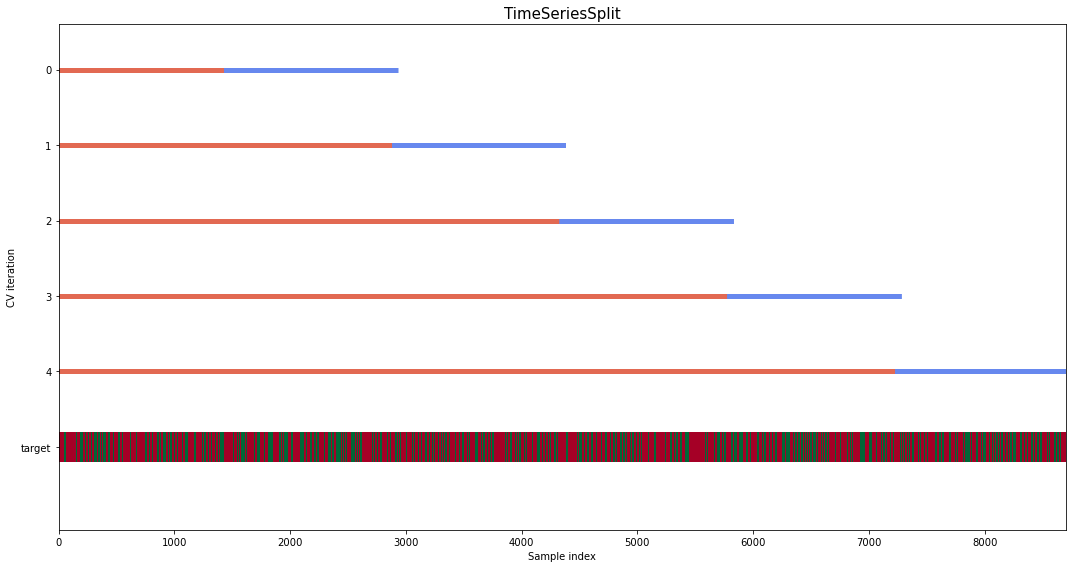

In [84]:
# Create the TimeSeriesSplit object
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Visualize the results
fig, ax = plt.subplots(figsize=(15, 8))
plot_timeseries_cv_indices(tscv, X, y, ax, n_splits)
plt.tight_layout()
plt.show()

In [77]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, TimeSeriesSplit

df = pd.concat((eurusd, gbpusd, usdjpy), axis=0)
df = gbpusd
# Make a copy of the dataframe and drop rows with NA values
df_copy = df[list_X + [col_y]].dropna()
df_copy = df_copy[~np.isinf(df_copy).any(axis=1)]

# Create feature matrix X and target vector y
X = df_copy[list_X].iloc[:-1,:].values
y = df_copy[col_y].iloc[1:].values

# Initialize classifier
clf = RandomForestClassifier(max_depth=3,random_state=42)

# K-Fold cross validation
tscv = TimeSeriesSplit(n_splits=5)
#kf = KFold(n_splits=k, shuffle=False)

# Collect scores
scores = cross_val_score(clf, X, y, cv=tscv, scoring="accuracy")

print(f"Scores for each fold: {scores}")
print(f"Average Accuracy: {np.mean(scores):.2f}")
print(f"Standard Deviation: {np.std(scores):.2f}")


Scores for each fold: [0.68719212 0.6317734  0.6637931  0.59852217 0.59482759]
Average Accuracy: 0.64
Standard Deviation: 0.04


# WARNINGS

Very good accuracy but BE CAREFUL, the acccuracy doesn't mean anything for us. We need to know the HIT ratio when we enter in position
